In [7]:
!gdown --id 1K4c-u0WLTje5v42WLV0jCPz_x4p3xt5H

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1K4c-u0WLTje5v42WLV0jCPz_x4p3xt5H
From (redirected): https://drive.google.com/uc?id=1K4c-u0WLTje5v42WLV0jCPz_x4p3xt5H&confirm=t&uuid=cd584ba5-2f26-42d0-b981-8eb8431ecb59
To: /content/RegresiUTSTelkom.csv
100% 443M/443M [00:02<00:00, 152MB/s]


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/RegresiUTSTelkom.csv', header=None)

     0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

         86         87    

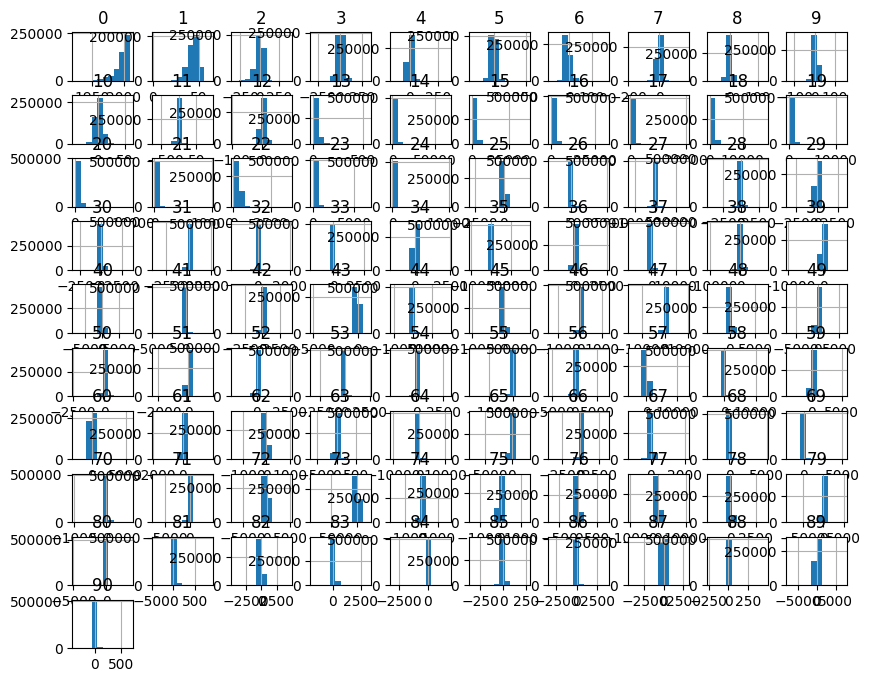

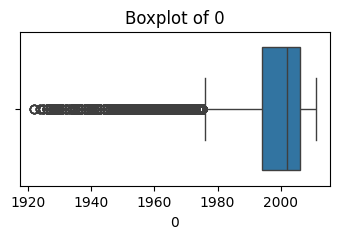

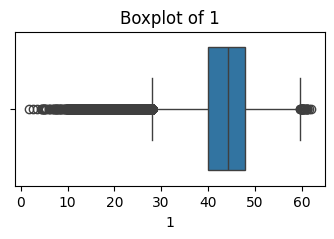

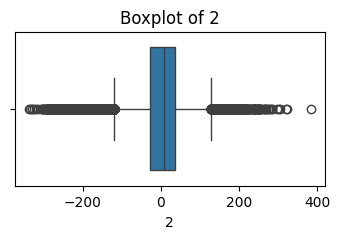

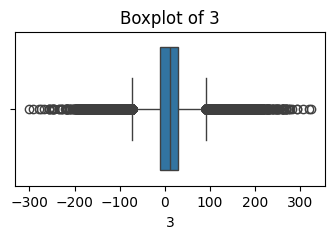

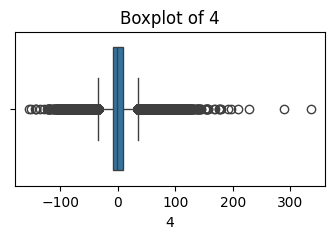

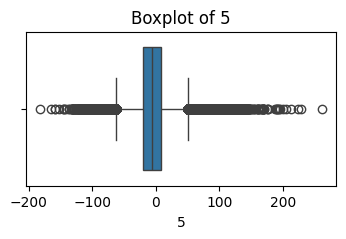

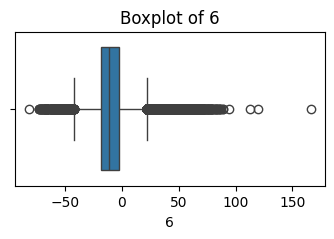

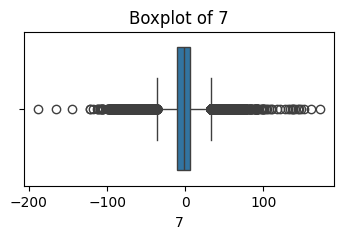

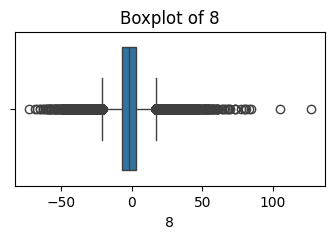

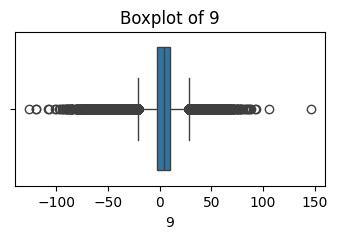

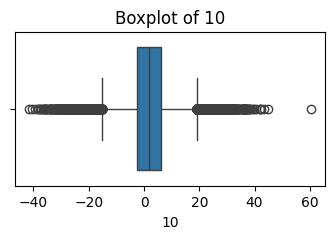

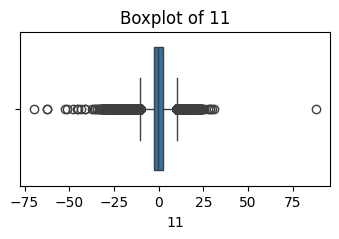

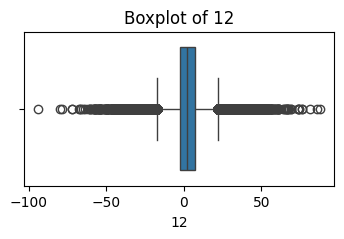

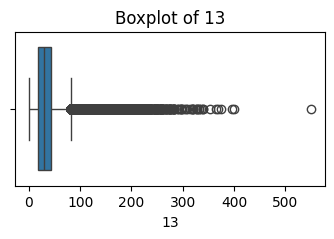

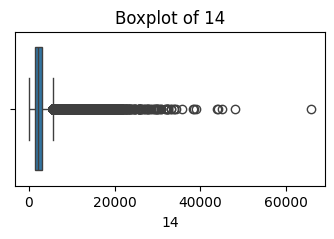

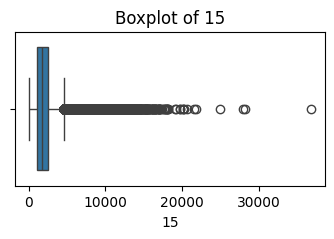

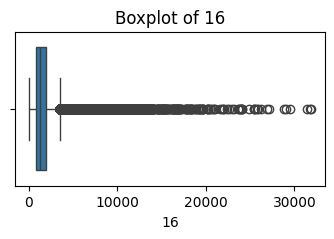

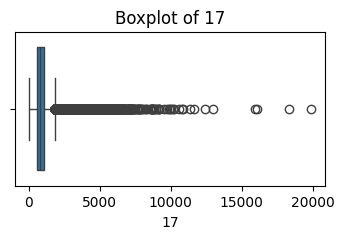

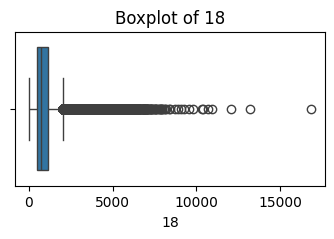

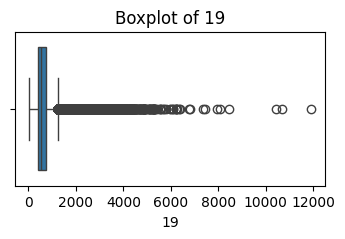

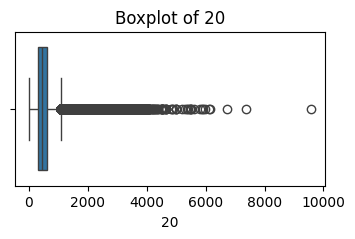

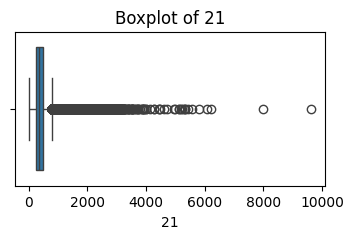

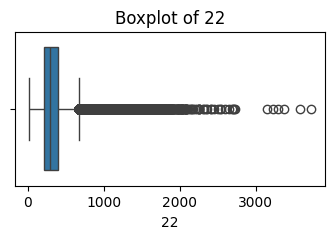

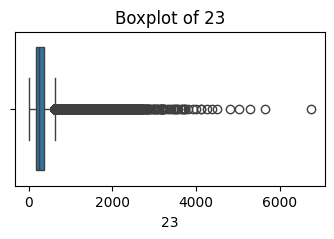

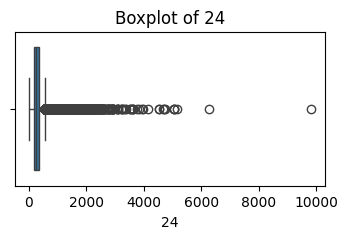

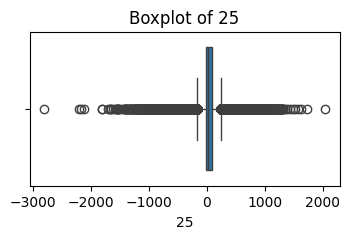

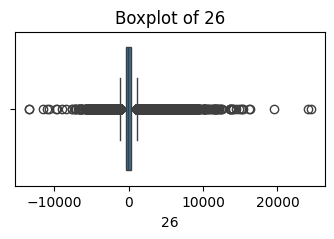

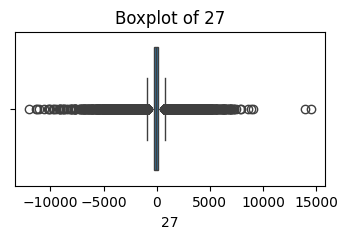

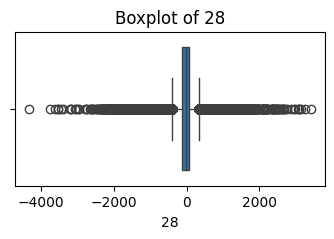

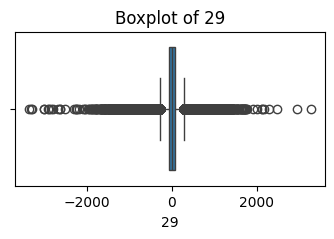

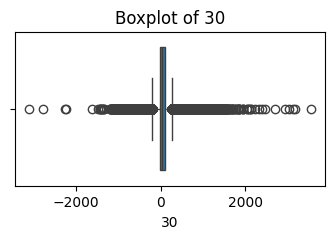

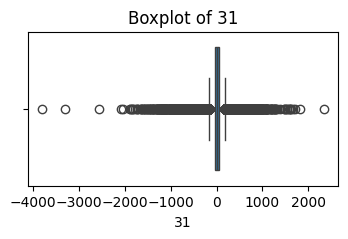

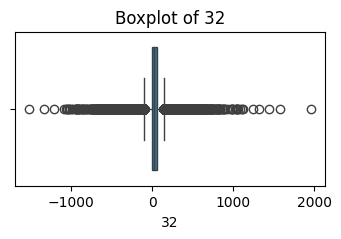

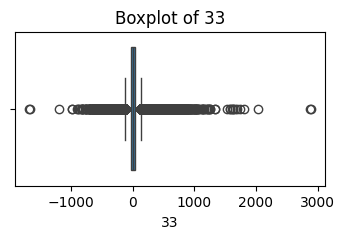

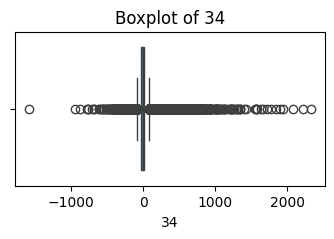

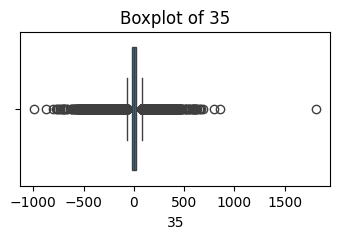

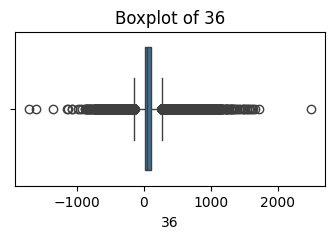

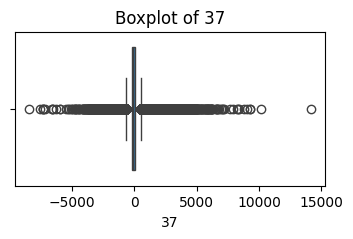

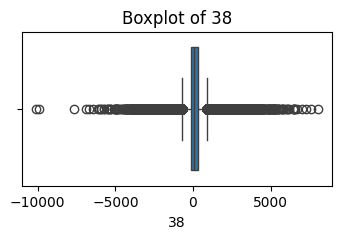

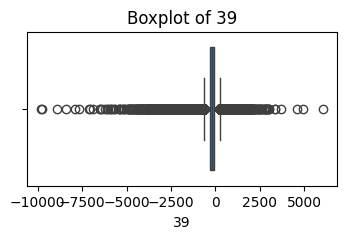

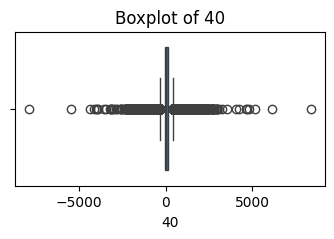

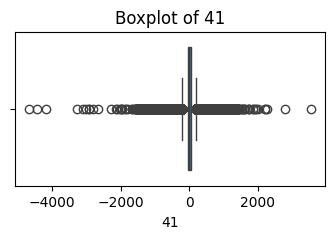

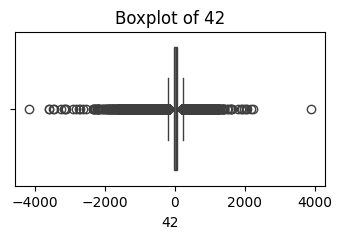

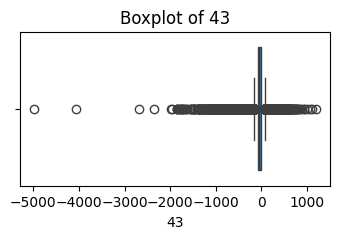

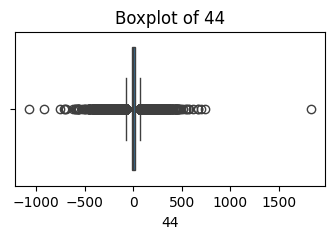

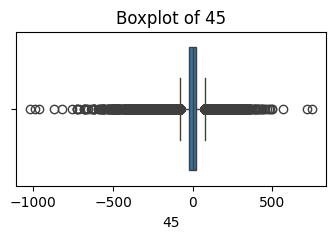

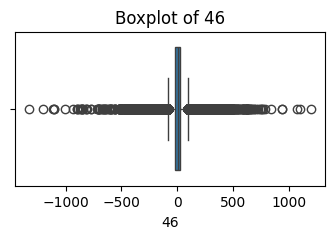

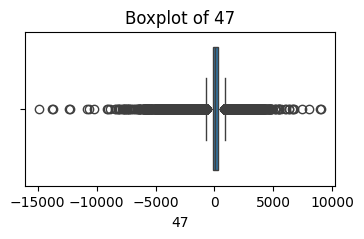

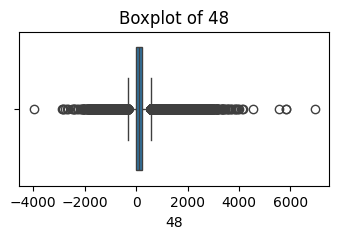

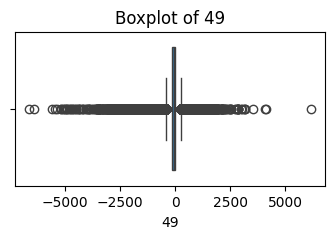

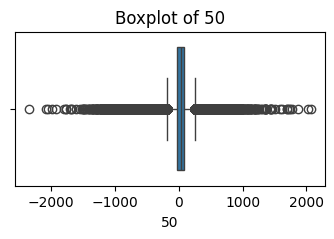

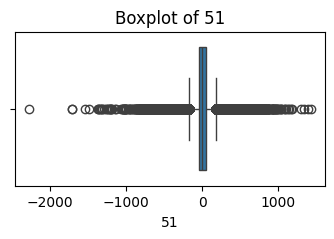

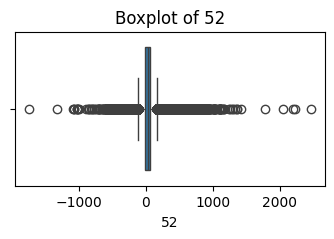

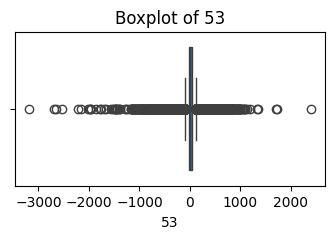

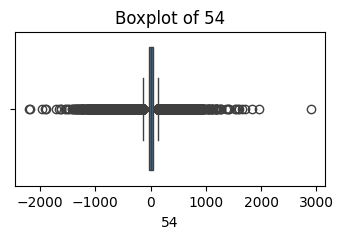

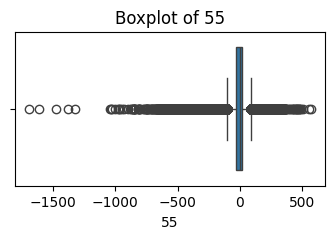

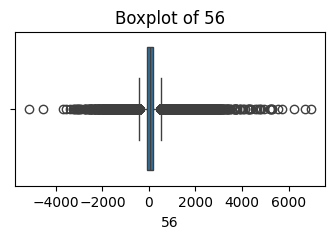

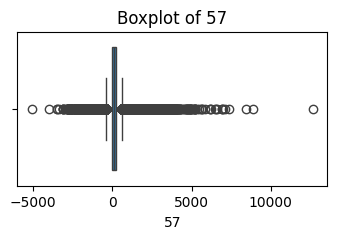

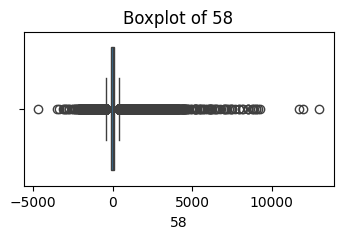

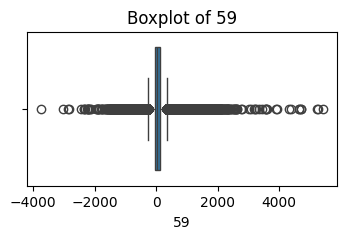

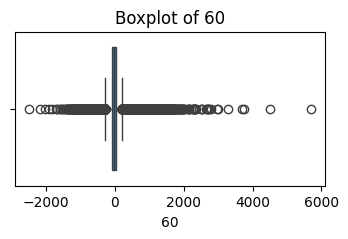

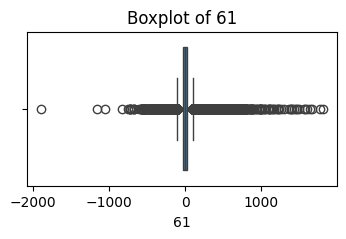

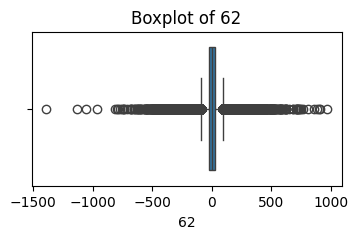

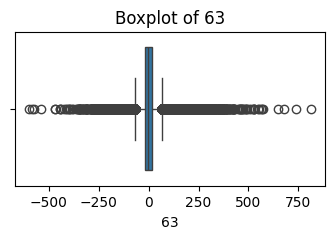

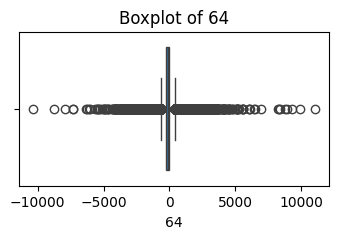

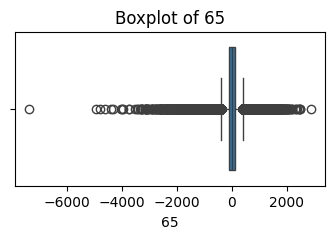

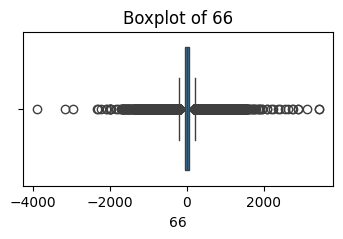

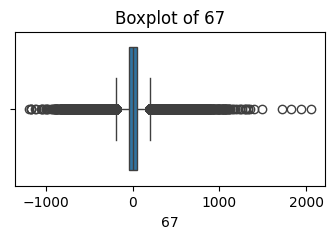

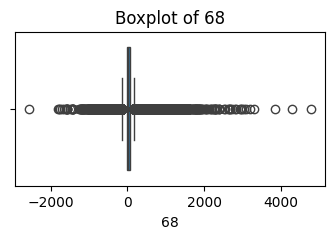

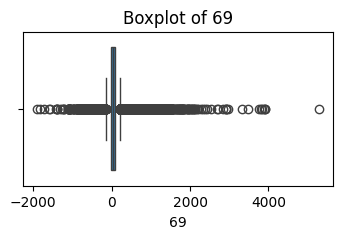

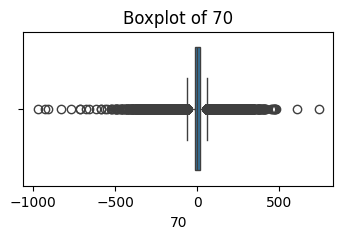

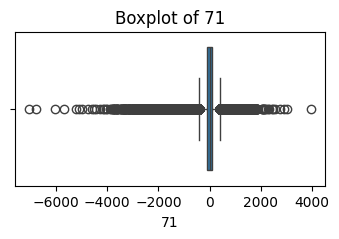

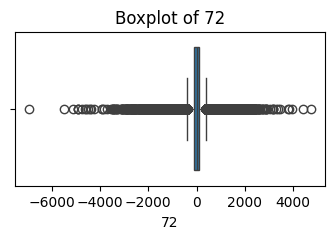

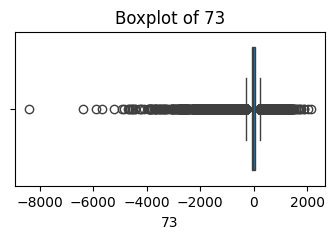

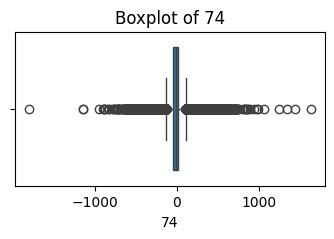

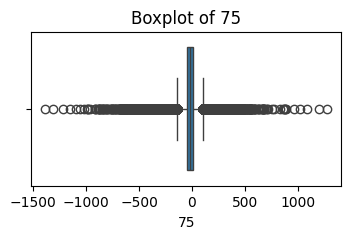

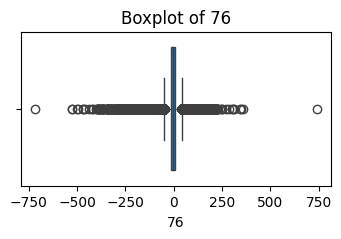

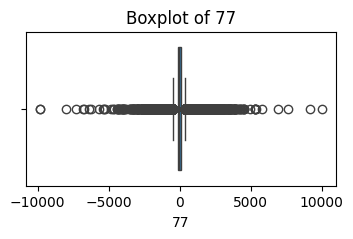

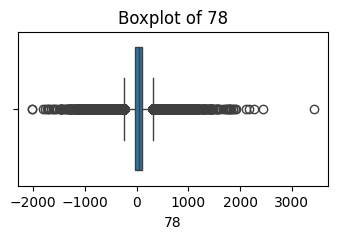

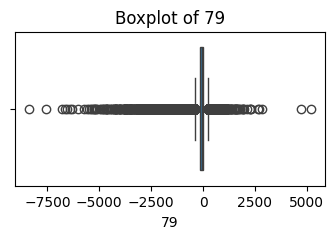

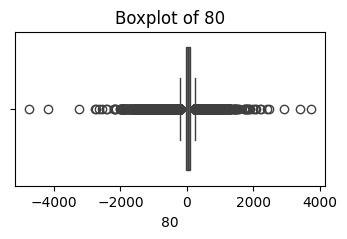

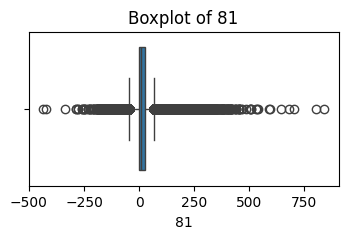

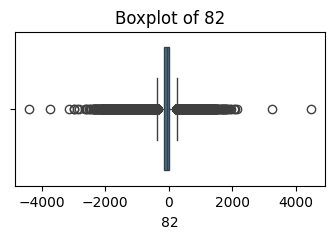

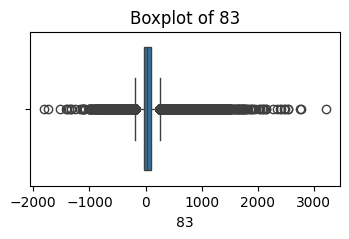

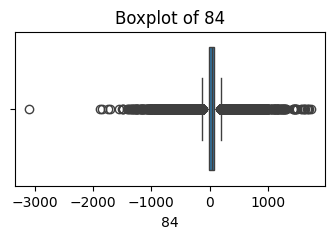

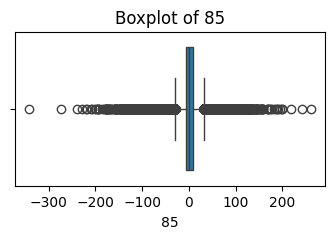

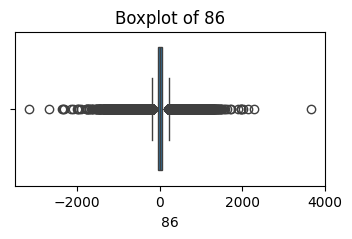

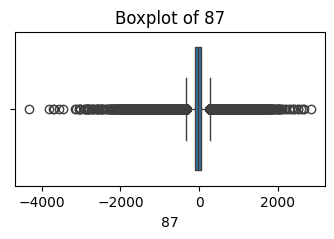

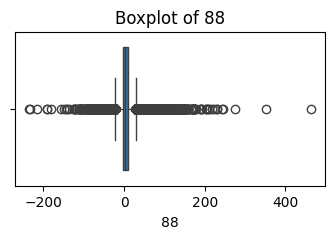

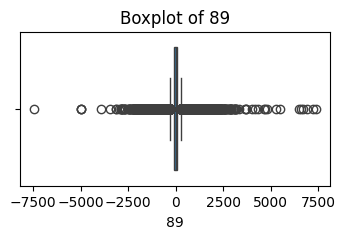

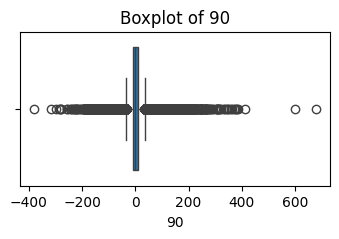

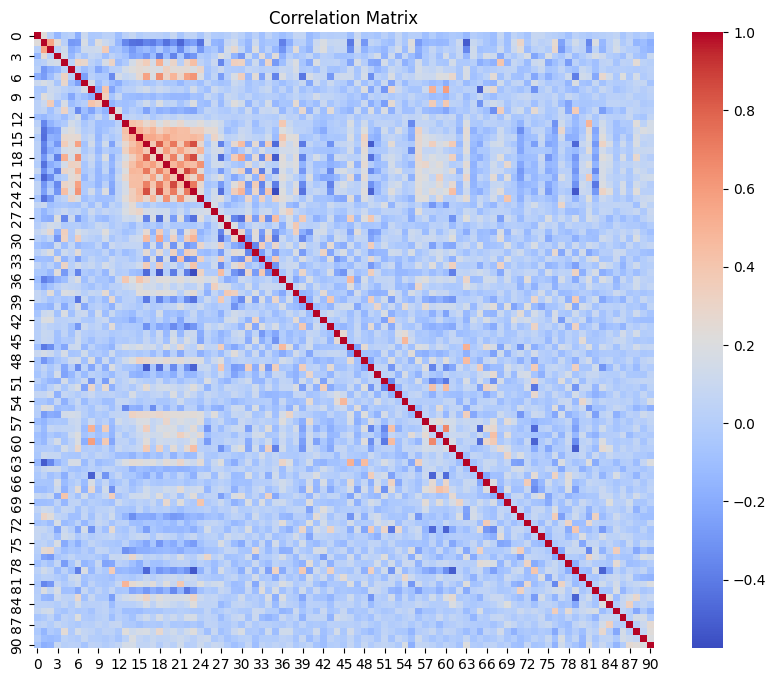

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/RegresiUTSTelkom.csv', header=None)

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


df.hist(figsize=(10, 8))
plt.show()

for col in df.columns:
  plt.figure(figsize=(4, 2)) # Ukuran plot
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()


plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
# sns.pairplot(df)
# plt.show()


In [10]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, SelectKBest, f_regression

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hapus fitur konstan/quasi-konstan
selector_const = VarianceThreshold(threshold=0.01)
X_train_sel = selector_const.fit_transform(X_train)
X_test_sel = selector_const.transform(X_test)

# Hapus fitur duplikat
train_df = pd.DataFrame(X_train_sel)
duplicate_cols = train_df.T.duplicated()
X_train_sel = train_df.loc[:, ~duplicate_cols]
X_test_sel = pd.DataFrame(X_test_sel).loc[:, ~duplicate_cols]

# Seleksi dengan Mutual Information
mi = mutual_info_regression(X_train_sel, y_train)
mi_scores = pd.Series(mi, index=X_train_sel.columns)
selected_features = mi_scores.nlargest(10).index
X_train_sel = X_train_sel[selected_features]
X_test_sel = X_test_sel[selected_features]

# Seleksi dengan ANOVA
selector_anova = SelectKBest(f_regression, k=5)
X_train_sel = selector_anova.fit_transform(X_train_sel, y_train)
X_test_sel = selector_anova.transform(X_test_sel)

In [11]:
from sklearn.preprocessing import StandardScaler

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

Linear Regression: RMSE = 20.47, R² = 0.14
Polynomial Regression: RMSE = 20.20, R² = 0.16
Decision Tree: RMSE = 27.99, R² = -0.61
KNN: RMSE = 21.07, R² = 0.09
Bagging: RMSE = 20.82, R² = 0.11
Gradient Boosting: RMSE = 19.70, R² = 0.20
SVR: RMSE = 19.79, R² = 0.20


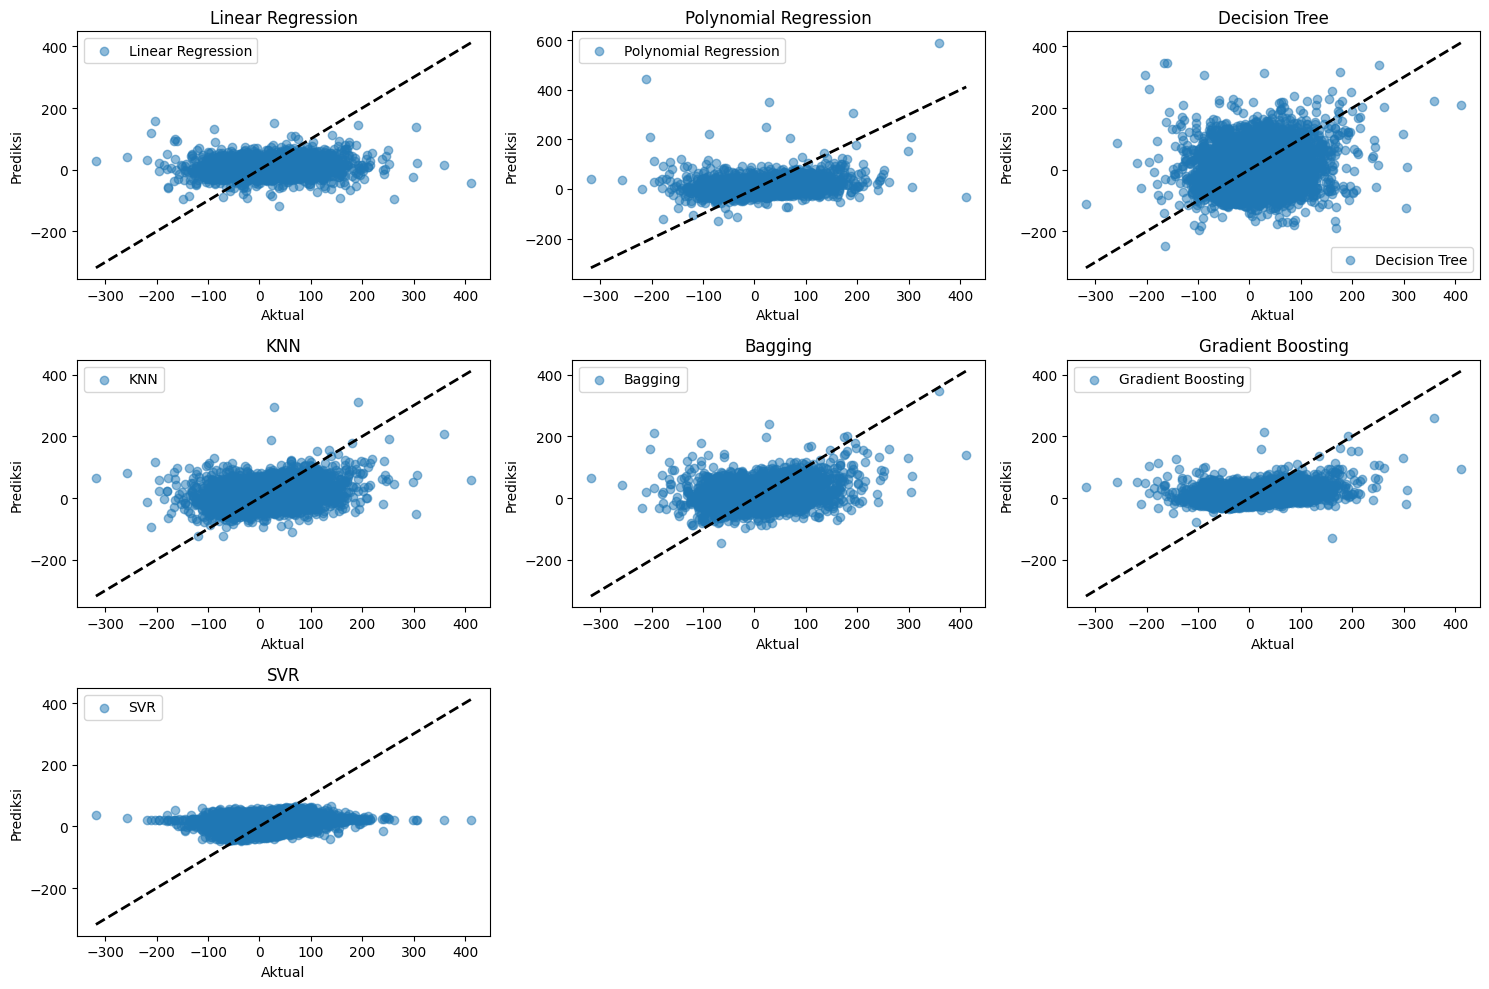

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'Bagging': BaggingRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# Hasil Evaluasi
for model, metrics in results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.2f}, R² = {metrics['R2']:.2f}")

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    plt.subplot(3, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Aktual')
    plt.ylabel('Prediksi')
    plt.title(name)
    plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


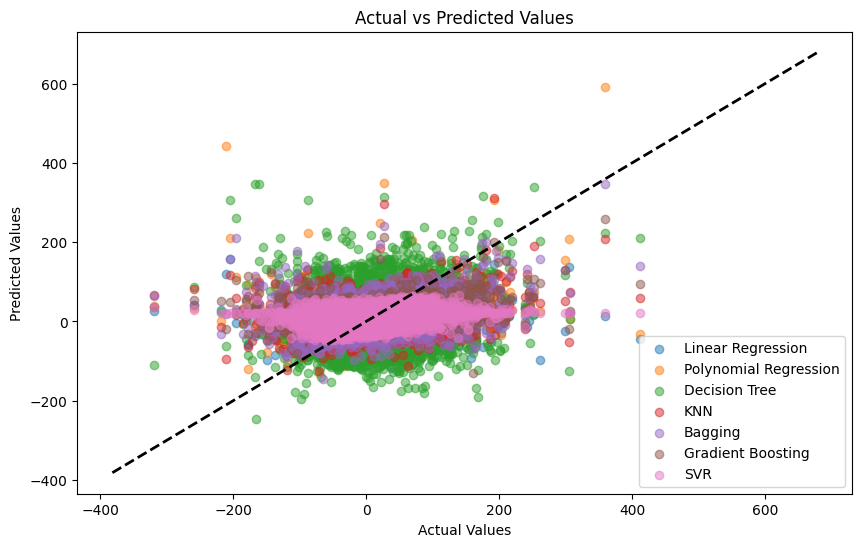

Model-model yang digunakan:
1. Linear Regression: Model regresi linier sederhana yang memodelkan hubungan linier antara variabel independen dan dependen.
2. Polynomial Regression:  Ekstensi dari regresi linier yang memodelkan hubungan non-linier dengan menambahkan fitur polinomial.
3. Decision Tree: Model regresi berbasis pohon keputusan yang mempartisi data berdasarkan fitur-fitur untuk memprediksi nilai target.
4. KNN (K-Nearest Neighbors): Model regresi yang memprediksi nilai target berdasarkan nilai rata-rata dari K titik data terdekat.
5. Bagging Regressor:  Ensemble learning method yang menggabungkan beberapa model decision tree untuk meningkatkan akurasi dan stabilitas prediksi.
6. Gradient Boosting Regressor: Ensemble learning method yang menggabungkan beberapa model decision tree secara berurutan, di mana setiap model berusaha untuk memperbaiki kesalahan model sebelumnya.
7. SVR (Support Vector Regression): Model regresi yang menggunakan konsep SVM untuk mencari hyperplane ter

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for model_name in models:
    y_pred = models[model_name].predict(X_test_scaled)
    plt.scatter(y_test, y_pred, alpha=0.5, label=model_name)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

print("Model-model yang digunakan:")
print("1. Linear Regression: Model regresi linier sederhana yang memodelkan hubungan linier antara variabel independen dan dependen.")
print("2. Polynomial Regression:  Ekstensi dari regresi linier yang memodelkan hubungan non-linier dengan menambahkan fitur polinomial.")
print("3. Decision Tree: Model regresi berbasis pohon keputusan yang mempartisi data berdasarkan fitur-fitur untuk memprediksi nilai target.")
print("4. KNN (K-Nearest Neighbors): Model regresi yang memprediksi nilai target berdasarkan nilai rata-rata dari K titik data terdekat.")
print("5. Bagging Regressor:  Ensemble learning method yang menggabungkan beberapa model decision tree untuk meningkatkan akurasi dan stabilitas prediksi.")
print("6. Gradient Boosting Regressor: Ensemble learning method yang menggabungkan beberapa model decision tree secara berurutan, di mana setiap model berusaha untuk memperbaiki kesalahan model sebelumnya.")
print("7. SVR (Support Vector Regression): Model regresi yang menggunakan konsep SVM untuk mencari hyperplane terbaik yang memisahkan data dan meminimalkan kesalahan prediksi.")

print("\n\nAnalisa: ")
print("1. Jika model linear regression atau decision tree mengalami underfitting pada dataset ini, berikut beberapa strategi untuk meningkatkan performanya:")

print("\n 1. Penambahan Fitur (Feature Engineering):")
print("       - Deskripsi: Mengkonstruksi fitur baru dari fitur yang sudah ada atau menambahkan fitur eksternal yang relevan dengan target.  Misalnya, jika variabel 'luas tanah' dan 'luas bangunan' sudah ada, kita bisa membuat fitur baru 'rasio luas bangunan terhadap luas tanah'. Atau, jika dataset adalah data penjualan rumah, kita bisa menambahkan data demografi wilayah sebagai fitur tambahan.")
print("       - Pengaruh pada Bias-Variance Tradeoff: Penambahan fitur yang relevan dapat mengurangi bias model karena model menjadi lebih kompleks dan mampu menangkap pola yang lebih rumit dalam data. Namun, jika fitur yang ditambahkan tidak relevan atau malah menambah noise, hal ini bisa meningkatkan varians model karena model menjadi terlalu sensitif terhadap noise dalam data pelatihan.")

print("\n 2. Transformasi Fitur (Feature Transformation):")
print("       - Deskripsi: Mengubah skala atau distribusi fitur yang ada.  Misalnya, transformasi polinomial (seperti yang sudah dilakukan dengan PolynomialFeatures) untuk mengubah hubungan linier menjadi non-linier, atau transformasi logaritmik untuk mengatasi skewness pada data.  Standarisasi atau normalisasi juga termasuk di sini.")
print("       - Pengaruh pada Bias-Variance Tradeoff: Transformasi fitur dapat mengurangi bias dengan memungkinkan model untuk mempelajari hubungan non-linier dalam data. Namun, transformasi yang terlalu kompleks dapat meningkatkan varians, membuat model terlalu sensitif terhadap data pelatihan dan kurang mampu menggeneralisasi ke data baru.")

print("\n 3. Mengubah Model ke Algoritma yang Lebih Kompleks:")
print("       - Deskripsi:  Mengganti model linear regression atau decision tree dengan model yang lebih kompleks, seperti Random Forest, Gradient Boosting, atau Support Vector Machine (SVM). Model-model ini memiliki kemampuan untuk mempelajari hubungan non-linier dan interaksi fitur yang lebih rumit.")
print("       - Pengaruh pada Bias-Variance Tradeoff: Model-model yang lebih kompleks umumnya memiliki bias yang lebih rendah karena mampu menangkap pola yang lebih rumit.  Namun, kompleksitasnya juga bisa meningkatkan varians, terutama jika model terlalu kompleks untuk ukuran dataset.  Oleh karena itu, penting untuk menyeimbangkan kompleksitas model dengan jumlah data.")

print("\n 4. Mengurangi Regularisasi (jika ada):")
print("       - Deskripsi: Jika model menggunakan regularisasi (seperti L1 atau L2),  mengurangi kekuatan regularisasi dapat membantu model mempelajari pola yang lebih detail. Namun, hal ini perlu dilakukan dengan hati-hati untuk menghindari overfitting.")
print("       - Pengaruh pada Bias-Variance Tradeoff: Mengurangi regularisasi akan mengurangi bias dengan memperbolehkan model lebih fleksibel untuk menyesuaikan data training, namun juga berpotensi meningkatkan varians.")


print("\n2. Berikut dua alternatif loss function untuk masalah regresi selain MSE, beserta perbandingan keunggulan dan kelemahannya:")
print("\n 1. Mean Absolute Error (MAE)")
print("       - Formula: MAE = (1/n) * Σ|yi - ŷi|")
print("       - Keunggulan:")
print("         - Lebih robust terhadap outlier dibandingkan MSE karena tidak mengkuadratkan selisih error.")
print("         - Lebih mudah diinterpretasi karena satuannya sama dengan variabel target.")
print("       - Kelemahan:")
print("          Gradiennya tidak konstan di titik nol, yang dapat memperlambat proses konvergensi dalam algoritma optimisasi berbasis gradien.")
print("         - Kurang sensitif terhadap kesalahan prediksi yang besar.")
print("       - Skenario yang Cocok:")
print("         - Data dengan banyak outlier, karena outlier tidak akan terlalu memengaruhi nilai MAE.")
print("         - Saat interpretasi nilai error dalam satuan variabel target penting.")


print("\n 2. Huber Loss")
print("       - Formula:  Kombinasi dari MSE dan MAE.")
print("         Huber Loss = 0.5 * (yi - ŷi)^2  jika |yi - ŷi| ≤ δ")
print("                 δ * |yi - ŷi| - 0.5 * δ^2 jika |yi - ŷi| > δ")
print("       - Keunggulan:")
print("         - Menggabungkan keunggulan MSE dan MAE. Robust terhadap outlier seperti MAE, tetapi masih sensitif terhadap kesalahan kecil seperti MSE.")
print("         - Gradiennya konstan di sekitar titik nol, sehingga lebih stabil dalam optimisasi.")
print("       - Kelemahan:")
print("         - Memerlukan penentuan parameter δ, yang menentukan ambang batas antara penggunaan MSE dan MAE.")
print("         - Interpretasinya kurang langsung dibandingkan MAE.")
print("       - Skenario yang Cocok:")
print("         - Data yang memiliki beberapa outlier tetapi tidak terlalu banyak.")
print("         - Saat membutuhkan keseimbangan antara robustnes terhadap outlier dan sensitivitas terhadap kesalahan prediksi kecil.")

print("\n3. Beberapa metode untuk mengukur pentingnya fitur dalam model tanpa mengetahui nama fitur:")
print("\n  1. Permutation Feature Importance:")
print("       - Prinsip Teknis: Metode ini mengukur penurunan performa model ketika nilai-nilai fitur diacak secara acak.  Dengan mengacak nilai fitur, kita 'merusak' informasi yang dibawa oleh fitur tersebut. Jika pengacakan fitur menyebabkan penurunan signifikan pada akurasi atau metrik evaluasi lainnya, itu menunjukkan bahwa fitur tersebut penting bagi model.  Kita mengukur pentingnya fitur berdasarkan besarnya penurunan performa tersebut.")
print("       - Keterbatasan:")
print("         - Tidak selalu memberikan hasil yang akurat untuk model-model non-linier yang kompleks.")
print("         - Dapat dipengaruhi oleh korelasi antar fitur. Jika beberapa fitur berkorelasi tinggi, pengacakan salah satu fitur mungkin tidak terlalu berpengaruh karena informasi yang hilang masih bisa diakses oleh model melalui fitur lain yang berkorelasi.")
print("         - Perhitungannya bisa memakan waktu untuk dataset yang besar.")


print("\n 2. Feature Importance Berdasarkan Impurity Reduction (untuk model berbasis pohon):")
print("       - Prinsip Teknis: Pada model pohon keputusan (decision tree), feature importance dihitung berdasarkan seberapa banyak setiap fitur berkontribusi dalam mengurangi impurity (misalnya Gini impurity atau entropy) di setiap node pohon. Fitur yang lebih sering digunakan untuk membuat keputusan yang menghasilkan penurunan impurity yang signifikan dianggap lebih penting.")
print("       - Keterbatasan:")
print("         -  Biasanya hanya berlaku untuk model yang berbasis pohon seperti Random Forest atau Gradient Boosting.")
print("         -  Fitur dengan banyak kategori (misalnya fitur kategorikal dengan banyak level) cenderung memiliki nilai importance yang lebih tinggi daripada fitur numerik, meskipun belum tentu mengindikasikan pentingnya fitur yang sebenarnya.")
print("         -  Bisa menjadi tidak akurat ketika terdapat korelasi tinggi antar fitur.")


print("\n 3. Analisis Koefisien Regresi (untuk model linier):")
print("       - Prinsip Teknis:  Besar dan tanda dari koefisien regresi menunjukkan dampak dari fitur terkait terhadap variabel target. Koefisien dengan nilai absolut yang besar menunjukkan bahwa perubahan pada fitur tersebut akan menghasilkan perubahan besar pada variabel target. Tanda positif atau negatif menunjukkan arah hubungan.")
print("       - Keterbatasan:")
print("         - Hanya berlaku untuk model linier. Koefisien dalam model linier hanya mengukur pengaruh linier dari fitur.  Pada model non-linier, koefisien mungkin tidak mencerminkan pengaruh sebenarnya dari fitur terhadap variabel target.")
print("         - Tidak dapat digunakan untuk mendeteksi interaksi antar fitur.")
print("         - Sensitif terhadap skala data. Fitur yang memiliki skala besar akan cenderung memiliki koefisien lebih besar meskipun pentingnya tidak selalu tinggi.")

print("\n4. Desain Eksperimen untuk Optimasi Hyperparameter")
print("   1. Metode:")
print("       - Grid Search: Mencoba semua kombinasi hyperparameter dalam rentang yang ditentukan.")
print("       - Random Search: Mencoba kombinasi hyperparameter secara acak dalam rentang yang ditentukan.")
print("       - Bayesian Optimization:  Menggunakan model probabilistik untuk memandu pencarian hyperparameter optimal, dengan mempertimbangkan hasil evaluasi sebelumnya.")
print("       - Evolutionary Algorithms: Menggunakan prinsip evolusi untuk mencari hyperparameter optimal.")
print("       - Cross Validation: Teknik yang digunakan untuk melatih dan mengevaluasi kinerja model dengan berbagai kombinasi hyperparameter.")

print("\n 2. Langkah-Langkah Umum:")
print("       a. Bagi dataset menjadi tiga bagian: train, validation, dan test.")
print("       b. Tentukan rentang hyperparameter yang ingin dicoba.")
print("       c. Pilih metode pencarian hyperparameter (misal, Grid Search, Random Search).")
print("       d. Gunakan Cross Validation pada data train untuk mengevaluasi kinerja model untuk setiap kombinasi hyperparameter.")
print("       e. Pilih kombinasi hyperparameter yang memberikan hasil terbaik pada data validasi.")
print("       f. Evaluasi kinerja model pada data test sebagai ukuran generalisasi model.")

print("\n 3. Trade-off:")
print("       - Komputasi: Grid search memerlukan waktu komputasi yang lama, terutama untuk banyak hyperparameter dan rentang yang besar. Random search dan Bayesian optimization bisa lebih efisien.")
print("       - Stabilitas Pelatihan: Beberapa metode, seperti Bayesian optimization, mungkin kurang stabil pada tahap awal pencarian.  Penggunaan cross-validation yang tepat dapat membantu mengurangi masalah ini.")
print("       - Generalisasi Model: Hasil terbaik pada data validasi tidak menjamin generalisasi yang baik pada data yang belum pernah dilihat. Data test sangat penting untuk mengukur generalisasi model.")

print("\n 4. Contoh (untuk SGDRegressor):")
print("       - Hyperparameter: learning_rate, alpha (L2 penalty), max_iter, tol")
print("       - Metode: Random Search dengan 50 iterasi")
print("       - Metrik Evaluasi: RMSE pada data validasi")
print("       - Evaluasi Akhir: RMSE dan R^2 pada data test")

print("\n 5. Contoh (untuk Decision Tree):")
print("       - Hyperparameter: max_depth, min_samples_split, min_samples_leaf, max_features")
print("       - Metode: Grid Search dengan kombinasi hyperparameter tertentu")
print("       - Metrik Evaluasi: RMSE pada data validasi")
print("       - Evaluasi Akhir: RMSE dan R^2 pada data test")

print("\n5. Jika residual plot menunjukkan pola non-linear dan heteroskedastisitas dalam model linear regression, langkah-langkah yang dapat diambil adalah:")
print("   1. Transformasi Data:")
print("       - Transformasi variabel dependen (y):  Misalnya, logaritma, akar kuadrat, atau Box-Cox transformation.  Tujuannya adalah untuk menstabilkan varians dan membuat hubungan antara variabel independen dan dependen lebih linier.")
print("       - Transformasi variabel independen (X):  Mirip dengan transformasi y, transformasi pada variabel independen juga dapat membantu mengatasi heteroskedastisitas dan non-linearitas.")
print(" 2. Ubah Model:")
print("       - Gunakan model non-linear: Jika hubungan antara variabel independen dan dependen memang non-linear, model linear regression tidak tepat. Pertimbangkan untuk menggunakan model non-linear seperti polynomial regression, Support Vector Regression (SVR), decision tree, random forest, atau neural network.")
print("       - Weighted Least Squares (WLS):  Metode ini memberikan bobot yang berbeda pada observasi berdasarkan variansnya, sehingga dapat mengatasi heteroskedastisitas. Bobot diberikan lebih tinggi pada observasi dengan varians yang lebih kecil.")
print(" 3. Tambah Variabel Interaksi atau Kuadrat:")
print("       - Jika residual plot menunjukkan pola tertentu, mungkin ada interaksi antar variabel independen atau variabel independen yang memiliki efek kuadrat yang tidak ditangkap oleh model. Tambahkan variabel interaksi (misalnya, X1*X2) atau variabel kuadrat (X1^2) ke dalam model.")
print(" 4. Periksa Outlier dan Data yang Hilang:")
print("       - Outlier: Adanya outlier yang signifikan dapat mempengaruhi asumsi linearitas dan homoskedastisitas. Identifikasi dan tangani outlier yang ekstrem. Beberapa cara untuk menangani outlier adalah dengan menghapus outlier, mengubah nilainya, atau menggunakan metode yang lebih robust terhadap outlier.")
print("       - Data Hilang: Data yang hilang juga bisa berpengaruh pada kualitas model dan hasil analisis. Periksa dan tangani data yang hilang dengan tepat, misalnya dengan imputasi nilai yang hilang.")
print(" 5. Validasi Model:")
print("       - Setelah menerapkan salah satu atau kombinasi langkah di atas, evaluasi kembali model dan residual plot untuk memastikan perbaikan telah terjadi. Gunakan metrik evaluasi yang tepat, seperti MAE, MSE, atau RMSE, dan bandingkan dengan model sebelumnya. Selain itu, pertimbangkan juga untuk menggunakan metode validasi silang (cross-validation) untuk mendapatkan hasil yang lebih reliabel dan objektif.")
